In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [2]:
def pendulum_dynamics(x, l = 1., g = 9.81):
    theta = x[0:1]
    theta_dot = x[1:]

    theta_ddot = (-g/l)*np.sin(theta)

    return np.concatenate([theta_dot, theta_ddot], axis=0)

In [3]:
def euler_integration(x0, dt, total_time):
    times = [0.]
    states = [x0]

    t = 0.
    x = np.copy(x0)
    while t < (total_time - 1e-6):
        x = x + pendulum_dynamics(x) * dt
        t += dt
        states.append(np.copy(x))
        times.append(t)
    
    return states, times

In [4]:
def plot_hist(hist, t, plot_vel = False):
    fig = plt.figure()  # no frame
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(t, [h[0] for h in hist], color='black')
    if plot_vel:
        ax.plot(t, [h[1] for h in hist], color='yellow', alpha=0.3)

    plt.show()

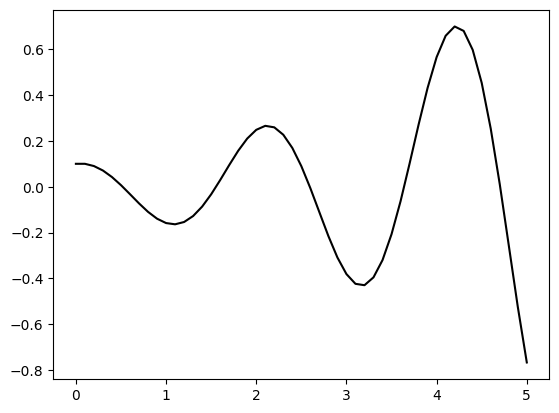

In [5]:
# Linear Approximation is always overshooting!
x0 = np.array([[0.1, 0.]]).T
dt = 0.1
total_time = 5.
hist, t = euler_integration(x0, dt, total_time)

plot_hist(hist, t)

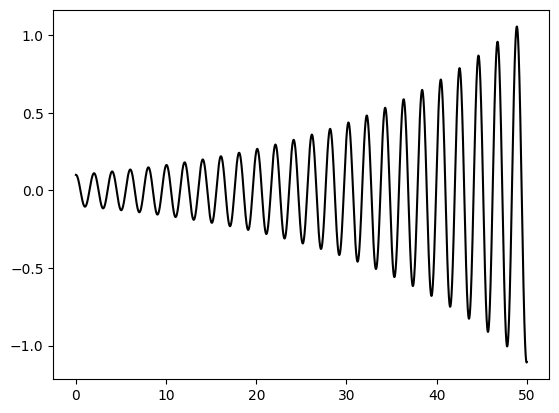

In [10]:
# Linear Approximation is always overshooting! Even with small dt!
dt = 0.01
total_time = 50.
hist, t = euler_integration(x0, dt, total_time)

plot_hist(hist, t)

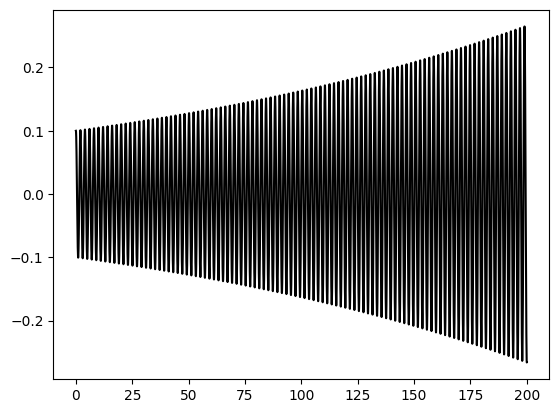

In [11]:
# Linear Approximation is always overshooting! Even with small small small dt!
dt = 0.001
total_time = 200.
hist, t = euler_integration(x0, dt, total_time)

plot_hist(hist, t)